In [2]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Get uploaded filename
filename = next(iter(uploaded))

# Read into dataframe
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Show first rows
df.head()


Saving updated_u2714523_DS7010_Credit.csv to updated_u2714523_DS7010_Credit.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,2,33,2,2,3,2,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,2,34,1,-1,-1,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,1,50,1,2,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,2,29,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,2,32,1,-2,-1,0,0,...,326,-235,-235,0,326,0,0,0,1200,0


In [3]:
selected_columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "default payment next month"
]

df = df[selected_columns]

print("Shape after selecting columns:", df.shape)
df.head()


Shape after selecting columns: (37382, 23)


,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,33,2,2,3,2,0,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,34,1,-1,-1,-2,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,50,1,2,0,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,29,0,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,32,1,-2,-1,0,0,-2,...,326,-235,-235,0,326,0,0,0,1200,0


In [4]:
# Features and target
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (37382, 22)
Target shape: (37382,)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features shape:", X_scaled.shape)


Scaled features shape: (37382, 22)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 29905
Test size: 7477


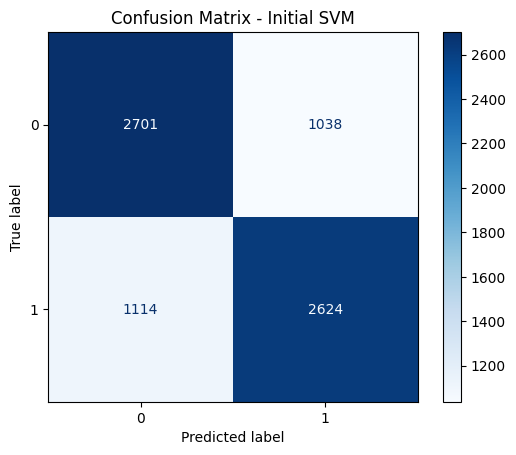

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Initial SVM")
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

# Initialize GridSearchCV
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,        # 5-fold cross-validation
    verbose=2,
    n_jobs=-1    # Use all CPU cores
)

# Fit grid search
grid_svm.fit(X_train, y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best Cross-Validation Accuracy:", grid_svm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7309814412305634


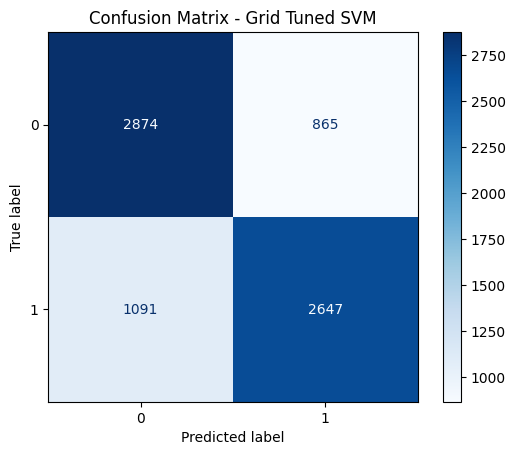

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      3739
           1       0.75      0.71      0.73      3738

    accuracy                           0.74      7477
   macro avg       0.74      0.74      0.74      7477
weighted avg       0.74      0.74      0.74      7477



In [9]:
# Get the best model
best_svm = grid_svm.best_estimator_

# Predictions
y_pred_best = best_svm.predict(X_test)

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_svm.classes_)
disp_best.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Grid Tuned SVM")
plt.show()

# Performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


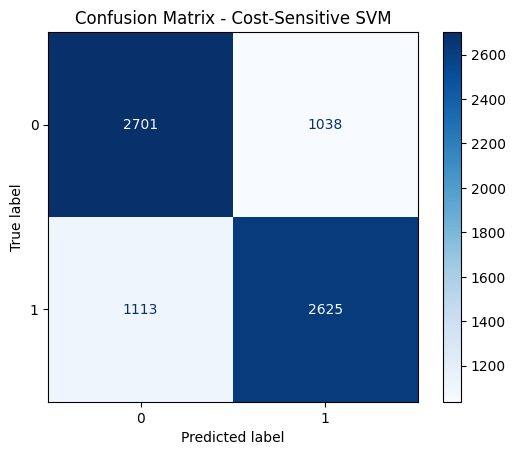

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3739
           1       0.72      0.70      0.71      3738

    accuracy                           0.71      7477
   macro avg       0.71      0.71      0.71      7477
weighted avg       0.71      0.71      0.71      7477



In [10]:
# Cost-sensitive SVM (handles imbalance by adjusting class weights)
cost_svm = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train
cost_svm.fit(X_train, y_train)

# Predictions
y_pred_cost = cost_svm.predict(X_test)

# Confusion matrix
cm_cost = confusion_matrix(y_test, y_pred_cost)
disp_cost = ConfusionMatrixDisplay(confusion_matrix=cm_cost, display_labels=cost_svm.classes_)
disp_cost.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Cost-Sensitive SVM")
plt.show()

# Performance report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cost))


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

# --------------------------
# Scale features for KNN
# --------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initial KNN (k=5)
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3739
           1       0.74      0.76      0.75      3738

    accuracy                           0.75      7477
   macro avg       0.75      0.75      0.75      7477
weighted avg       0.75      0.75      0.75      7477



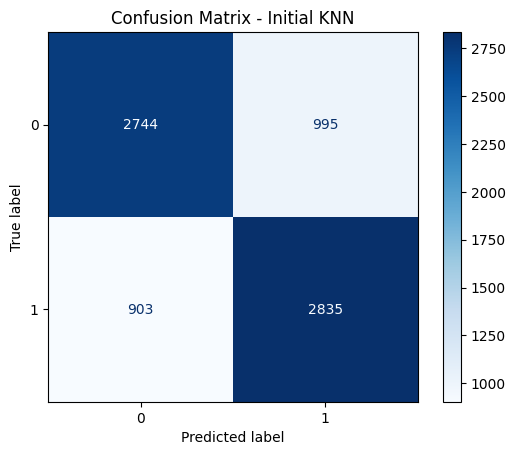

In [12]:
# 1. Initial KNN
# --------------------------
knn_initial = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn_initial.fit(X_train_scaled, y_train)
y_pred_knn_initial = knn_initial.predict(X_test_scaled)

print("Initial KNN (k=5)")
print(classification_report(y_test, y_pred_knn_initial))

cm1 = confusion_matrix(y_test, y_pred_knn_initial)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Initial KNN")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (GridSearch KNN): {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best CV Accuracy: 0.7741180404614613

Grid Tuned KNN
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3739
           1       0.76      0.82      0.79      3738

    accuracy                           0.78      7477
   macro avg       0.78      0.78      0.78      7477
weighted avg       0.78      0.78      0.78      7477



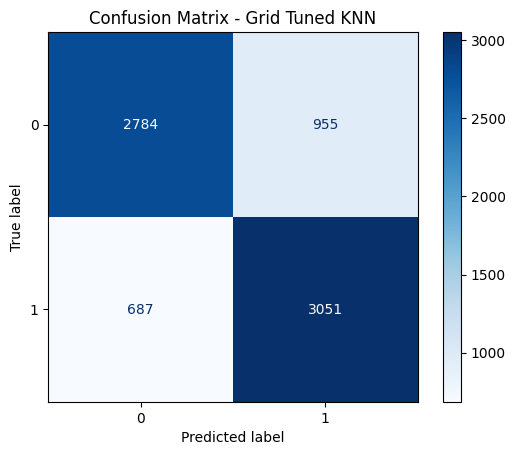

In [14]:
# 2. Grid Tuned KNN
# --------------------------
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_knn.fit(X_train_scaled, y_train)

print("Best Parameters (GridSearch KNN):", grid_knn.best_params_)
print("Best CV Accuracy:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_
y_pred_knn_best = best_knn.predict(X_test_scaled)

print("\nGrid Tuned KNN")
print(classification_report(y_test, y_pred_knn_best))

cm2 = confusion_matrix(y_test, y_pred_knn_best)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Grid Tuned KNN")
plt.show()

In [16]:
# Step 1: Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
# Step 2: Oversample minority classes to handle class imbalance
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)


In [18]:
# Step 3: Train KNN on the balanced data
from sklearn.neighbors import KNeighborsClassifier
knn_cost = KNeighborsClassifier(n_neighbors=5, weights='distance')  # distance weighting optional
knn_cost.fit(X_resampled, y_resampled)


KNeighborsClassifier(weights='distance')

In [19]:

# Step 4: Predict and evaluate
y_pred_knn_cost = knn_cost.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn_cost))


              precision    recall  f1-score   support

           0       0.80      0.73      0.76      3739
           1       0.75      0.81      0.78      3738

    accuracy                           0.77      7477
   macro avg       0.77      0.77      0.77      7477
weighted avg       0.77      0.77      0.77      7477



In [20]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example dataset (replace with your data)
# X = features, y = target
# X, y = your_data_features, your_data_target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Train models
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Calculate metrics
metrics = {
    "Model": ["SVM", "KNN"],
    "Accuracy": [accuracy_score(y_test, svm_pred), accuracy_score(y_test, knn_pred)],
    "Precision": [precision_score(y_test, svm_pred, average='weighted'),
                  precision_score(y_test, knn_pred, average='weighted')],
    "Recall": [recall_score(y_test, svm_pred, average='weighted'),
               recall_score(y_test, knn_pred, average='weighted')],
    "F1 Score": [f1_score(y_test, svm_pred, average='weighted'),
                 f1_score(y_test, knn_pred, average='weighted')]
}

# Create comparison table
comparison_table = pd.DataFrame(metrics)
print(comparison_table)


  Model  Accuracy  Precision    Recall  F1 Score
0   SVM  0.745085   0.745657  0.745085  0.744826
1   KNN  0.748963   0.750081  0.748963  0.748806


In [21]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# === Step 0: Prepare your dataset ===
# X = features, y = target
# X, y = your_data_features, your_data_target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Step 1: Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 2: Train SVM ===
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# === Step 3: Train standard KNN ===
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# === Step 4: Train cost-sensitive KNN (oversampling + distance weighting) ===
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

knn_cost = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_cost.fit(X_resampled, y_resampled)
y_pred_knn_cost = knn_cost.predict(X_test_scaled)

# === Step 5: Create comparison table ===
def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }

metrics = pd.DataFrame([
    {"Model": "SVM", **compute_metrics(y_test, y_pred_svm)},
    {"Model": "KNN", **compute_metrics(y_test, y_pred_knn)},
    {"Model": "Cost-Sensitive KNN", **compute_metrics(y_test, y_pred_knn_cost)}
])

print(metrics)


                Model  Accuracy  Precision    Recall  F1 Score
0                 SVM  0.745085   0.745657  0.745085  0.744826
1                 KNN  0.748963   0.750081  0.748963  0.748806
2  Cost-Sensitive KNN  0.767821   0.770303  0.767821  0.767447
